# Data Preparation

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/mac/code/TshepoKubeka/O-list/notebooks'

In [3]:
csv_path = os.path.join('..', 'O-list', 'data','csv')
csv_path

'../O-list/data/csv'

In [4]:
import pandas as pd
pd.read_csv(os.path.join(csv_path, 'olist_sellers_dataset.csv')).head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## File names containing ".csv"

In [5]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

## List of key names without .csv

In [6]:
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

## Construct Dict for the Data

EG.

data = {'sellers': Dataframe1, 'orders': Dataframe2, .....}

In [7]:
data = {}
for k,f in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [8]:
data['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


# Exploratory Analysis

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `rewiew_id`...
- all this belonging to an `order_id`

## - Run an automated exploratory analysis with [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)

In [9]:
!pip install --quiet pandas-profiling

In [10]:
!mkdir -p ../../O-list/data/reports

In [11]:
import pandas_profiling

datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

👉 Create and save one `html report` per dataset to profile 

In [12]:
for d in datasets_to_profile:
    print('exporting: '+d)
    profile = data[d].profile_report(title='Report for '+d)
    profile.to_file(output_file="../../O-list/data/reports/"+d+'.html');

exporting: orders


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: products


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: sellers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: customers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_reviews


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_items


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##  Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customers` are there ?**  

In [13]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews are there per order? Do we have reviews for all orders ?**

This info is not directly accessible in our individual csv hence we need to proceed to merge.


In [14]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id','seller_id']]

In [15]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5


In [16]:
# Check missing reviews?
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)

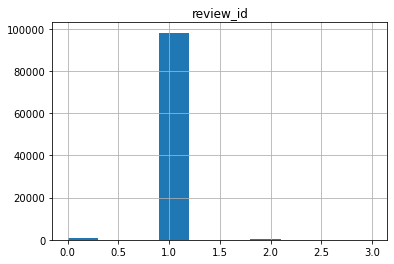

In [17]:
# We need to add the following magic command to make sure the plot displays correctly!
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ Nearly all orders have only one review per customer. We are safe!

In [18]:
#number of missing reviews
n_missing_reviews = orders_reviews.isna().sum()['review_id']

# Olist's Metric Design 

Here, we are going to catch a first glimpse into `Olist's business health`

<AxesSubplot:xlabel='review_score', ylabel='count'>

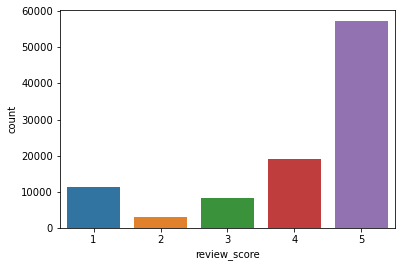

In [19]:
sns.countplot(x='review_score', data=data['order_reviews'])